# 영화 추천을 위한 이용자 선호도 기반 군집분석
## 201884045 배상원 졸업작품

In [1]:
import time
import operator

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
rating_file_path = 'C:/Users/USER/Desktop/ml-1m/ratings.dat'
movie_file_path = 'C:/Users/USER/Desktop/ml-1m/movies.dat'
user_file_path = 'C:/Users/USER/Desktop/ml-1m/users.dat'

rating_data = pd.io.parsers.read_csv(rating_file_path,
                                    names=['user_id', 'movie_id', 'rating', 'time'], delimiter='::', encoding='ISO-8859-1')
movie_data = pd.io.parsers.read_csv(movie_file_path, 
                                    names=['movie_id', 'title', 'genre'], delimiter='::', encoding='ISO-8859-1')
user_data = pd.io.parsers.read_csv(user_file_path, 
                                   names=['user_id', 'gender', 'age', 'occupation', 'zipcode'], delimiter='::', encoding='ISO-8859-1')

In [2]:
#movie_data.drop('genre', axis = 1, inplace = True)
user_data.drop('zipcode', axis = 1, inplace = True)
rating_data.drop('time', axis = 1, inplace = True)

In [3]:
df_ratings_movie = pd.merge(rating_data, movie_data, on='movie_id')
df_ratings_movie = df_ratings_movie.sort_values(by=['user_id'])
df = pd.merge(df_ratings_movie, user_data, on='user_id')

In [4]:
df

,user_id,movie_id,rating,title,genre,gender,age,occupation
0,1,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10
1,1,48,5,Pocahontas (1995),Animation|Children's|Musical|Romance,F,1,10
2,1,938,4,Gigi (1958),Musical,F,1,10
3,1,1207,4,To Kill a Mockingbird (1962),Drama,F,1,10
4,1,1721,4,Titanic (1997),Drama|Romance,F,1,10
...,...,...,...,...,...,...,...,...
1000204,6040,2641,2,Superman II (1980),Action|Adventure|Sci-Fi,M,25,6
1000205,6040,1947,4,West Side Story (1961),Musical|Romance,M,25,6
1000206,6040,904,4,Rear Window (1954),Mystery|Thriller,M,25,6
1000207,6040,2664,4,Invasion of the Body Snatchers (1956),Horror|Sci-Fi,M,25,6


In [5]:
df.isna().sum()

user_id       0
movie_id      0
rating        0
title         0
genre         0
gender        0
age           0
occupation    0
dtype: int64

In [6]:
df.dropna()

,user_id,movie_id,rating,title,genre,gender,age,occupation
0,1,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10
1,1,48,5,Pocahontas (1995),Animation|Children's|Musical|Romance,F,1,10
2,1,938,4,Gigi (1958),Musical,F,1,10
3,1,1207,4,To Kill a Mockingbird (1962),Drama,F,1,10
4,1,1721,4,Titanic (1997),Drama|Romance,F,1,10
...,...,...,...,...,...,...,...,...
1000204,6040,2641,2,Superman II (1980),Action|Adventure|Sci-Fi,M,25,6
1000205,6040,1947,4,West Side Story (1961),Musical|Romance,M,25,6
1000206,6040,904,4,Rear Window (1954),Mystery|Thriller,M,25,6
1000207,6040,2664,4,Invasion of the Body Snatchers (1956),Horror|Sci-Fi,M,25,6


In [7]:
df['gender'] = df.gender.str.replace('F', '1')
df['gender'] = df.gender.str.replace('M', '2')
df['gender'] = df.gender.astype(int) 

In [8]:
df

,user_id,movie_id,rating,title,genre,gender,age,occupation
0,1,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama,1,1,10
1,1,48,5,Pocahontas (1995),Animation|Children's|Musical|Romance,1,1,10
2,1,938,4,Gigi (1958),Musical,1,1,10
3,1,1207,4,To Kill a Mockingbird (1962),Drama,1,1,10
4,1,1721,4,Titanic (1997),Drama|Romance,1,1,10
...,...,...,...,...,...,...,...,...
1000204,6040,2641,2,Superman II (1980),Action|Adventure|Sci-Fi,2,25,6
1000205,6040,1947,4,West Side Story (1961),Musical|Romance,2,25,6
1000206,6040,904,4,Rear Window (1954),Mystery|Thriller,2,25,6
1000207,6040,2664,4,Invasion of the Body Snatchers (1956),Horror|Sci-Fi,2,25,6


In [9]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [10]:
df_numeric = df[['rating', 'gender', 'age', 'occupation', 'user_id', 'title']]

In [11]:
df_numeric

,rating,gender,age,occupation,user_id,title
0,5,1,1,10,1,One Flew Over the Cuckoo's Nest (1975)
1,5,1,1,10,1,Pocahontas (1995)
2,4,1,1,10,1,Gigi (1958)
3,4,1,1,10,1,To Kill a Mockingbird (1962)
4,4,1,1,10,1,Titanic (1997)
...,...,...,...,...,...,...
1000204,2,2,25,6,6040,Superman II (1980)
1000205,4,2,25,6,6040,West Side Story (1961)
1000206,4,2,25,6,6040,Rear Window (1954)
1000207,4,2,25,6,6040,Invasion of the Body Snatchers (1956)


In [12]:
from sklearn import preprocessing

In [13]:
minmax_processed = preprocessing.MinMaxScaler().fit_transform(df_numeric.drop('title',axis=1))

In [14]:
df_numeric_scaled = pd.DataFrame(minmax_processed, index=df_numeric.index, columns=df_numeric.columns[:-1])

In [15]:
df_numeric_scaled

,rating,gender,age,occupation,user_id
0,1.00,0.0,0.000000,0.5,0.0
1,1.00,0.0,0.000000,0.5,0.0
2,0.75,0.0,0.000000,0.5,0.0
3,0.75,0.0,0.000000,0.5,0.0
4,0.75,0.0,0.000000,0.5,0.0
...,...,...,...,...,...
1000204,0.25,1.0,0.436364,0.3,1.0
1000205,0.75,1.0,0.436364,0.3,1.0
1000206,0.75,1.0,0.436364,0.3,1.0
1000207,0.75,1.0,0.436364,0.3,1.0


In [16]:
from sklearn.cluster import KMeans

k = 3

model = KMeans(n_clusters = k, random_state = 10)

model.fit(df_numeric_scaled)

df['cluster'] = model.fit_predict(df_numeric_scaled)

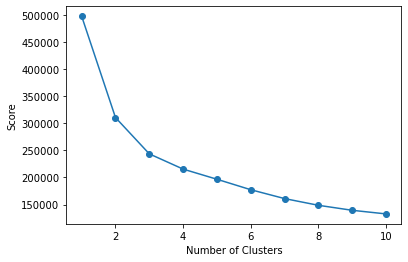

In [17]:
from sklearn.cluster import KMeans

def elbow(x):
    sse = []
    for i in range(1,11):
        km = KMeans(n_clusters=i,algorithm='auto', random_state=15)
        km.fit(x)
        sse.append(km.inertia_)

    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Score')
    plt.show()
elbow(df_numeric_scaled)

## k=3

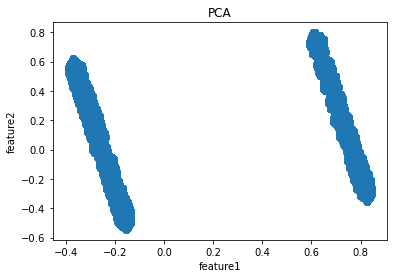

In [18]:
from sklearn import decomposition
import matplotlib.pyplot as plt


#compute PCA
pca = decomposition.PCA(n_components = 2)
pca.fit(df_numeric_scaled)
X_trans = pca.transform(df_numeric_scaled)
plt.scatter(X_trans[:, 0], X_trans[:, 1])
plt.title("PCA")
plt.xlabel("feature1")
plt.ylabel("feature2")
plt.show()

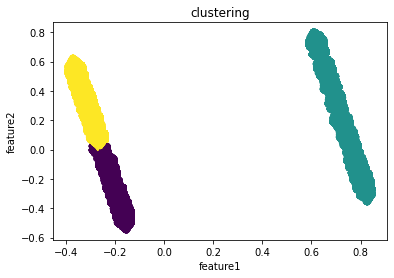

In [19]:
kmeans = KMeans(n_clusters=3)
kmeans = kmeans.fit(df_numeric_scaled)
y_kmeans = kmeans.predict(df_numeric_scaled)
plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y_kmeans)
plt.title("clustering")
plt.xlabel("feature1")
plt.ylabel("feature2")
plt.show()

In [20]:
df_numeric['cluster'] = kmeans.labels_

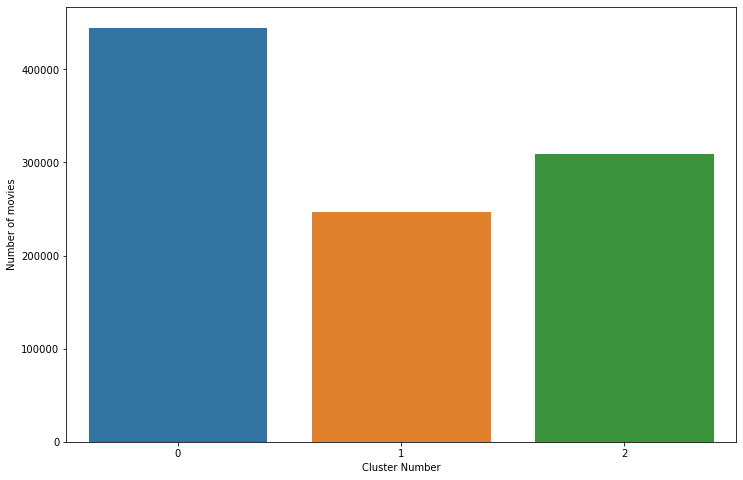

In [21]:
plt.figure(figsize=(12,8))
axis = sns.barplot(x=np.arange(0,3,1),y=df_numeric.groupby(['cluster']).count()['user_id'].values)
x=axis.set_xlabel("Cluster Number")
x=axis.set_ylabel("Number of movies")

In [22]:
df_numeric.groupby(['cluster']).mean()

,rating,gender,age,occupation,user_id
cluster,,,,,
0,3.546954,2.0,28.270588,3.520651,3015.669094
1,3.620366,1.0,29.803855,6.722837,3130.437380
2,3.600428,2.0,31.798054,15.580991,2952.772457


In [23]:
size_array = list(df_numeric.groupby(['cluster']).count()['rating'].values)
size_array

[444716, 246440, 309053]

## 군집 분석의 결과 해석을 해야하는데 군집 결과물에 이상이 있어 최종 제출에서 수정을 거쳐서 내용 추가 하겠습니다.